## 2D minimization of a six-hump camelback function

In [5]:
def f(x):
    x, y= x
    return 4 - 2.1 * x**2 + (x**4) / 3 + x * y + (4 * y**2 - 4) * y**2

In [7]:
import numpy as np
from scipy.optimize import minimize
x0 = [0, 0]
# Minimize the function using the Nelder-Mead method
result = minimize(f, x0)
minimum = result.x
minimum_value = result.fun
print("The global minima of tis function is = ", minimum_value , "at: ", minimum)

The global minima of tis function is =  4.0 at:  [0. 0.]


## Non-linear ODE: the damped pendulum

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that returns dy/dt (the right-hand side of the ODE)
def pendulum_eq(y, t, Q, g, l, d, Omega):
    theta, omega = y
    dydt = [omega, -1/Q * omega + g/l * np.sin(theta) + d * np.cos(Omega * t)]
    return dydt

Q = 2.0      
g = 9.81     
l = 10      
d = 1.5      
Omega = 0.5  

## FFT of a simple dataset

In [1]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [5]:
import pandas as pd
from scipy.signal import find_peaks
from scipy.fftpack import fft, fftfreq

df = pd.read_csv("./populations.txt", sep=' ')
lynx= df['lynx']
hare= df['hare']

#to get the periodicity we use the fourrier transformation using scipy.fftpack
lynx_fft = fft(lynx)
hare_fft = fft(hare)
lynx_abs = np.abs(lynx_fft)**2
hare_abs = np.abs(hare_fft)**2

lynx_peaks, _ = find_peaks(lynx_abs)
hare_peaks, _ = find_peaks(hare_abs)

lynx_t = 1 / fftfreq(len(lynx))[lynx_peaks]
hare_t = 1 / fftfreq(len(hare))[hare_peaks]
print(lynx_t, hare_t)

KeyError: 'lynx'

## FFT of an image

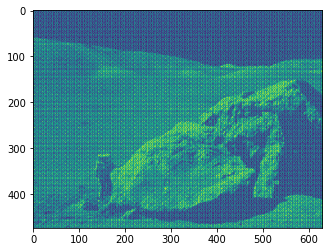

In [21]:
import matplotlib.pyplot as plt
img = plt.imread('./moonlanding.png')
plt.imshow(img)

In [26]:
from scipy.fftpack import fft2, ifft2
if img.ndim == 3:
    img = np.mean(img, axis=-1)

# Perform 2D FFT
img = fft2(img)

Text(0.5, 1.0, '2D FFT Spectrum')

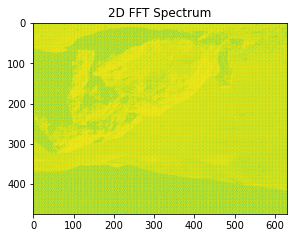

In [27]:
# Ploting the spectrum 
from matplotlib.colors import LogNorm
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.abs(img), norm=LogNorm(vmin=5))

In [31]:
noise_region_x = slice(10, 60)
noise_region_y = slice(220, 270)

filtered_image = np.abs(ifft2(imgfft))


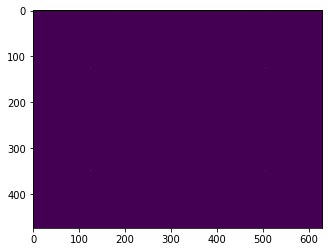

In [33]:
plt.imshow(filtered_image)